# CH03. 단순 선형 회귀 (Simple linear regression) (실습)

### [1] 실습 진행 관련 설명
선형 회귀에 대한 실습을 진행한다. 실습은 크게 두가지로 구성되어 있다.

- sklearn 라이브러리를 이용한 방법
- 직접 함수를 구현하는 방법

우선 sklearn 라이브러리를 이용한 방법을 실습하고 그 이후에 직접 함수를 구현하여 실습을 진행한다.

## [2] 코드 구현의 흐름


- (1) (데이터 측면) 데이터 불러오기

- (2) (데이터 측면) 데이터에서 훈련데이터와 테스트 데이터로 구분하기

- (3) (모델 측면) sklearn 라이브러리를 이용하여 선형 회귀 모델 불러오기. 또는 직접 함수 구현하기 (선형회귀 모델 정의).

- (4) (학습 과정) sklearn 라이브러리를 이용하여 모델 학습하기. 또는 직접 구현하기 (경사하강법).

- (5) (성능 평가) 테스트 데이터를 이용하여 학습된 모델에 대한 성능 평가하기. (Mean Squared Error)

## (첫번째 실습) sklearn 라이브러리를 이용한 방법




**실습 라이브러리 소개**

이번 실습에서는 numpy외에 pandas, matplotlib, sklearn과 같은 라이브러리가 활용된다. pandas는 행과 열로 구성된 2차원 데이터 처리 기능을 제공하는 라이브러리이며, matplotlib는 그래프등을 통해 데이터를 가시화하는 목적으로 사용되는 라이브러리이다. sklearn 라이브러리는 각종 머신러닝 모델이 구현되어 활용 가능한 라이브러리다.

In [66]:
'''
단순 선형 회귀(Simple Linear Regression)
import를 통해 라이브러리 불러온다.
as를 통해서 import로 불러온 라이브러리명을 재지정한다.
numpy를 np로 재지정하는 것처럼 pyplot 라이브러리는 plt로 pandas는 pd로 재지정한다.
'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Pandas 라이브러리**

1) Pandas에서는 data frame이라는 객체에 행과 열로 구성된 데이터를 저장한다. 데이터는 csv 포맷으로 저장되어 있는데 read_csv라는 함수로 데이터를 읽을 수 있다.

2) pandas의 데이터프레임에서는 컬럼에 부여된 이름을 이용하여 데이터에 접근할 수 있다.

3) pandas에서는 ndarray처럼 []를 이용하여 데이터에 접근한다."iloc[]"은 아래 행과 열의 숫자값을 지정하여 인덱싱을 수행한다.

In [67]:
'''
(1) (데이터 측면) 데이터 불러오기 (Importing the datas)
선형회귀 학습을 위해 'Salary_Data,csv' 파일을 불러온다.
'''
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values           # iloc 함수를 통해서 데이터셋의 특징벡터를 X에 저장.
y = dataset.iloc[:, 1].values             # iloc 함수를 통해서 데이터셋의 정답값을 y에 저장.

**훈련 데이터와 테스트 데이터**

train_test_split 함수는 학습 데이터를 모델의 학습을 위한 "훈련 데이터"와 학습된 모델의 성능 확인을 위한 "테스트 데이터"로 분할하는 동작을 한다. 훈련 데이터와 테스트 데이터를 구성/분할할 때는 훈련 데이터와 테스트 데이터에 중복되지 않는다.

In [68]:
'''
(2) (데이터 측면) 훈련 데이터셋과 테스트 데이터셋을 구분하기
X(특징벡터)와 y(정답값)을 훈련데이터셋과 테스트데이터셋으로 분할한다.
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)  # test_size를 통해서 훈련데이터와 테스트데이터의 비율을 설정 가능하다.

In [69]:
'''
(3) (모델 측면) 선형 회귀 모델 불러오기
sklearn 라이브러리를 통해 구현되어 있는 선형 회귀 모델을 불러온다.
'''
regressor = LinearRegression()

**fit과 predict**

sklearn 라이브러리는 인터페이스가 표준화가 잘 되어 있어 모델 학습 과정은 fit이라는 함수를 사용하고, 학습된 모델을 이용하여 회귀 값을 예측하는 과정은 predict 함수를 사용한다.

regressor.fit(X_train, y_train)는 X_train에 저장된 특징 벡터와 y_train에 저장된 정답값을 이용하여 선형 회귀 모델을 학습한다.

In [70]:
'''
(4) (학습 과정) 모델 학습 하기
fit을 통해 모델을 학습한다.
fit 함수에는 1) 가중치 초기화 2) 손실함수 계산 3) 가중치 업데이트가 모두 구현되어 있다.
'''
regressor.fit(X_train, y_train)  # 학습과정에서는 훈련데이터만 사용된다.
w_1 = regressor.coef_
w_0 = regressor.intercept_
print(w_1)
print(w_0)

[9440.83604639]
25743.697890196905


In [71]:
'''
(5) (성능 평가) 학습된 모델을 대상으로 테스트 데이터로 평가하기
predict를 통해 선형회귀로 얻은 예측값을 추출한다.
'''
y_pred = regressor.predict(X_test)  # 예측단계에서는 테스트데이터만 사용된다.
result = mean_squared_error(y_test, y_pred)
print(result)

21696883.35563027


**matplotlib 라이브러리**

데이터나 모델의 동작을 가시화하면 직관적으로 특징을 파악하기 쉽다.

matplotlib에는 가시화에 필요한 다양한 그래프들이 포함되어 있어 가시화에 도움이 된다.

Text(0, 0.5, 'Salary')

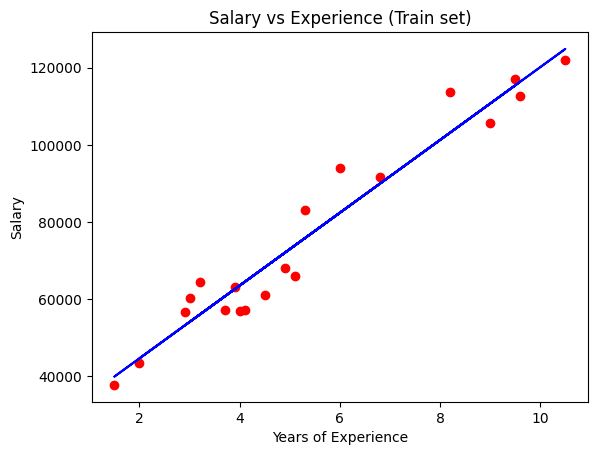

In [72]:
'''
훈련 데이터셋에 대한 시각화 (빨간색)
'''
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Train set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

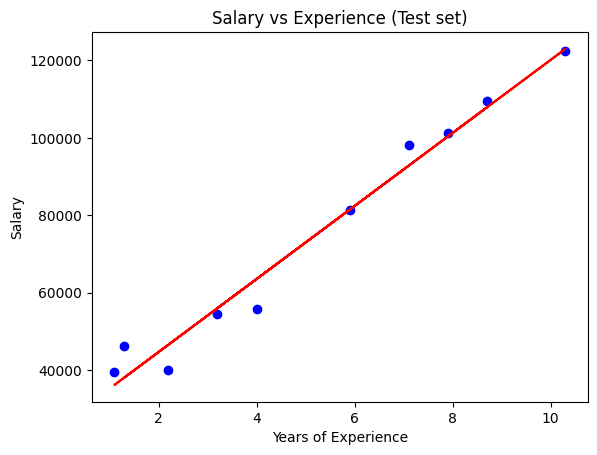

In [73]:
'''
테스트 데이터셋에 대한 시각화 (파란색)
'''
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## (두번째 실습) 직접구현


In [74]:
'''
(1) (데이터 측면) 데이터 불러오기
sklearn 라이브러리와 동일하다.
'''
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values           # iloc 함수를 통해서 데이터셋의 특징벡터를 X에 저장.
y = dataset.iloc[:, 1].values             # iloc 함수를 통해서 데이터셋의 정답값을 y에 저장.

In [75]:
'''
(2) (데이터 측면) 훈련 데이터셋과 테스트 데이터셋을 구분하기
sklearn 라이브러리와 동일하다.
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)  # test_size를 통해서 훈련데이터와 테스트데이터의 비율을 설정 가능하다.

In [76]:
'''
(3) (모델 측면) 선형 회귀 모델 불러오기
선형회귀를 위해 필요한 함수 및 변수를 선언한다.
'''
w_1 = 10  # 가중치 초기화
w_0 = 10
lr = 0.0025	 # 학습률(일반적인 경우 0 < lr < 1)

def linear_regressor(X):
	return w_1 * X + w_0

def mean_squared_error_loss(y_pred, y):
  return (y_pred - y) * (y_pred - y)

def gradient_descent(X, y, y_pred):
	global w_1, w_0
	w_1 = w_1 - lr * 2 * X * (y_pred - y)
	w_0 = w_0 - lr * 2 * 1 * (y_pred - y)

In [77]:
'''
(4) (학습 과정) 모델 학습 하기
(3)에서 구현한 함수를 통해 모델을 학습한다.
1) 가중치 초기화 2) 손실함수 계산 3) 가중치 업데이트를 모두 사용한다.
'''
for epoch in range(100):                  # 원하는 만큼 반복횟수를 설정해준다,
	for X, y in zip(X_train, y_train):
		y_pred = linear_regressor(X)          # 모델의 예측값 추출
		loss = mean_squared_error_loss(y_pred, y)  # 손실값 계산
		gradient_descent(X, y, y_pred)        # 손실값을 통한 경사하강법으로 w1, w0 업데이트
print(w_1, w_0)

[10368.76858209] [22555.16075301]


In [78]:
'''
(5) (성능 평가) 학습된 모델을 대상으로 테스트 데이터로 평가하기
sklearn 라이브러리와 동일
'''
y_pred = linear_regressor(X_test).flatten()  # 예측단계에서는 테스트데이터만 사용된다.
result = mean_squared_error(y_pred, y_test)
print(result)

49095432.10955065


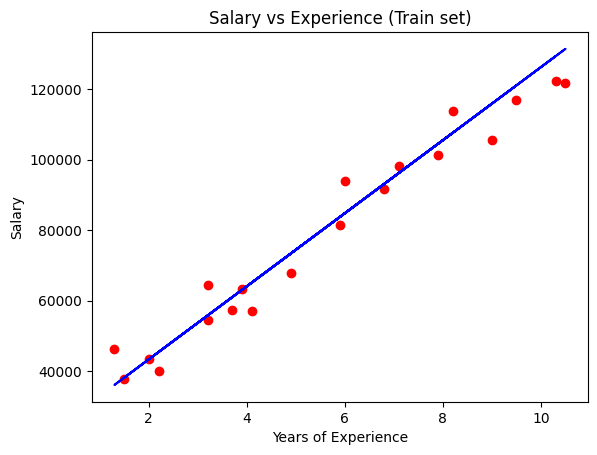

In [79]:
'''
훈련 데이터셋에 대한 시각화 (빨간색)
'''
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, [(w_1 * x + w_0) for x in X_train], color = 'blue')
plt.title('Salary vs Experience (Train set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

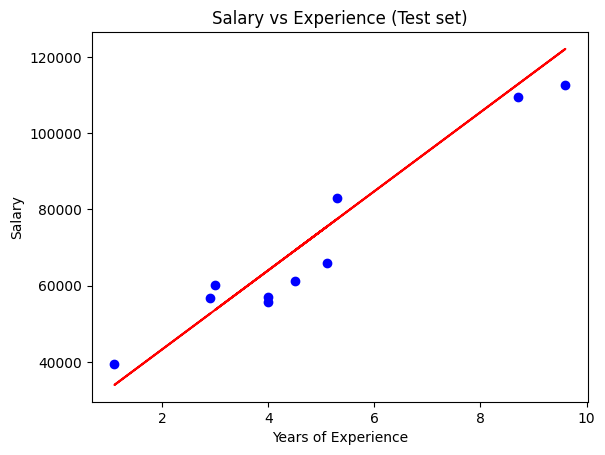

In [80]:
'''
테스트 데이터셋에 대한 시각화 (파란색)
'''
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, [(w_1 * x + w_0) for x in X_test], color = 'red')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()